In [1]:
from skimage import data, img_as_float, img_as_ubyte
from skimage import io, img_as_ubyte, exposure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import warnings
import numpy as np
from skimage import filters
import random
from skimage import segmentation

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [3]:
pola_monet = {0.01: 22969, 0.02: 29994, 0.05: 35829, 0.1: 25976, 0.2: 33252, 0.5: 38842, 1.0: 49378, 2.0: 45367, 5.0: 54034}

In [32]:
def segmentuj(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):
            if img[i][j] != 255.0:
                if img[i][j] == 0.0:
                    img[i][j] = random.randint(1, 250)
                    if img[i-1][j-1] != 0.0 and img[i-1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i-1][j] != 0.0 and img[i-1][j] != 255.0:
                        img[i][j] = img[i-1][j]
                    elif img[i-1][j+1] != 0.0 and img[i-1][j+1] != 255.0:
                        img[i][j] = img[i-1][j+1]
                    elif img[i][j-1] != 0.0 and img[i][j-1] != 255.0:
                        img[i][j] = img[i][j-1]
                    elif img[i][j+1] != 0.0 and img[i][j+1] != 255.0:
                        img[i][j] = img[i][j+1]
                    elif img[i+1][j-1] != 0.0 and img[i+1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i+1][j] != 0.0 and img[i+1][j] != 255.0:
                        img[i][j] = img[i+1][j]
                    elif img[i+1][j+1] != 0.0 and img[i+1][j+1] != 255.0:
                        img[i][j] = img[i+1][j+1]
                    else:
                        continue
                    #scalanie obiektów
                if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255.0:
                    img[i][j] = img[i-1][j-1]
                    
                elif img[i][j] != img[i-1][j] and img[i-1][j] != 255.0:
                    img[i][j] = img[i-1][j]
                    
                elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255.0:
                    img[i-1][j+1] = img[i][j]
                    
                elif img[i][j] != img[i][j-1] and img[i][j-1] != 255.0:
                    img[i][j-1] = img[i][j]
                    
                elif img[i][j] != img[i][j+1] and img[i][j+1] != 255.0:
                    img[i][j+1] = img[i][j]
                    
                elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255.0:
                    img[i][j] = img[i+1][j-1]
                    
                elif img[i][j] != img[i+1][j] and img[i+1][j] != 255.0:
                    img[i][j] = img[i+1][j]
                elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255.0:
                    img[i][j] = img[i+1][j+1]
                else:
                    continue
    return img


def scal(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):   
            if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255:
                img[i][j] = img[i-1][j-1]

            elif img[i][j] != img[i-1][j] and img[i-1][j] != 255:
                img[i][j] = img[i-1][j]

            elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255:
                img[i-1][j+1] = img[i][j]

            elif img[i][j] != img[i][j-1] and img[i][j-1] != 255:
                img[i][j-1] = img[i][j]

            elif img[i][j] != img[i][j+1] and img[i][j+1] != 255:
                img[i][j+1] = img[i][j]

            elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255:
                img[i][j] = img[i+1][j-1]

            elif img[i][j] != img[i+1][j] and img[i+1][j] != 255:
                img[i][j] = img[i+1][j]
            elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255:
                img[i][j] = img[i+1][j+1]
            else:
                continue
                
    return img

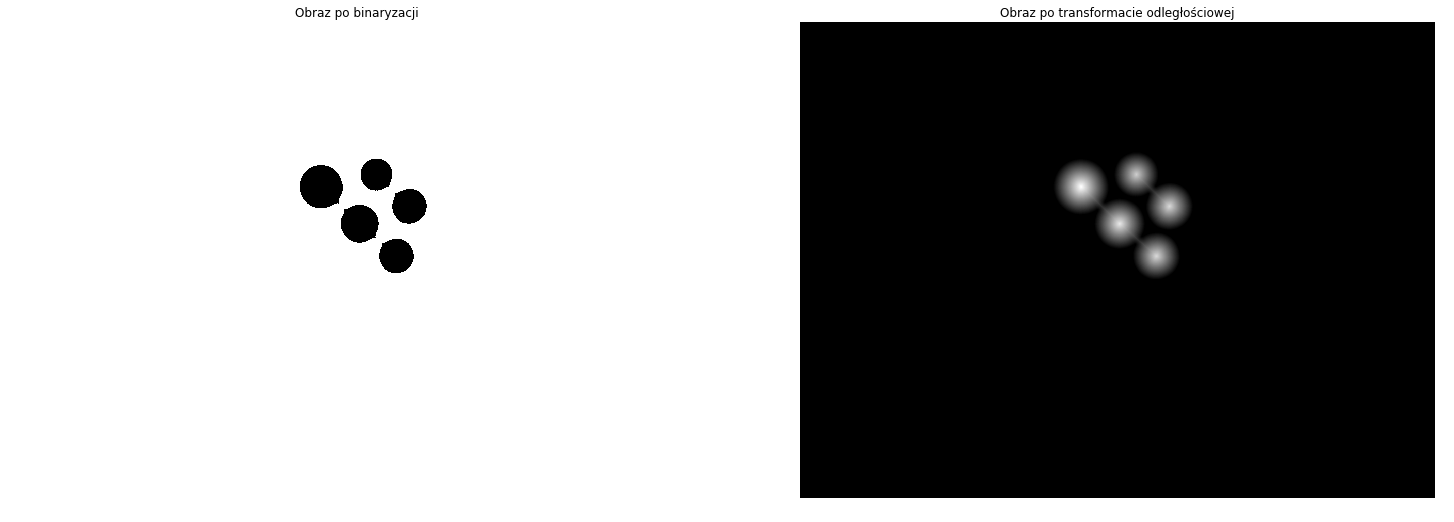

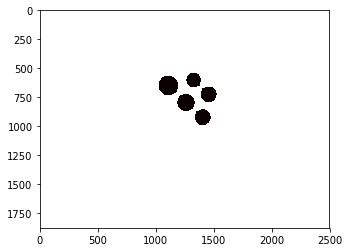

In [254]:
img = io.imread('przeskalowane/0.28.jpg')
th = 150
img = img_as_ubyte(rgb2gray(img))

th, bim = cv2.threshold(img, thresh=th, maxval=255, type=cv2.THRESH_OTSU)
mbim = cv2.medianBlur(bim,  11)
th = 25

dt = cv2.distanceTransform(mbim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)

th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)
show2imgs(bim, dt, title1='Obraz po binaryzacji', title2='Obraz po transformacie odległościowej', size=(25,25))

plt.imshow(bim, cmap="hot")
plt.axis('on')
plt.show()

nimg = segmentuj(bim)

In [255]:
def licz_obiekty(img):
    ile_obiektow = 0
    obiekty = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != 255:
                obiekty.append(img[i][j])
    ile_obiektow = len(list(set(obiekty)))# zlicza niepowtarzające się elementy listy
    return ile_obiektow

32
0
Wykonało się!
32
Wykonało się!
12
Wykonało się!
6
Wykonało się!


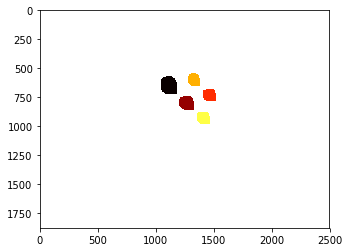

Obiektów jest:	 5


In [256]:
tmp = 0
ile = licz_obiekty(nimg)
print(ile)
while tmp != ile:
    print(tmp)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()
    
print("Obiektów jest:\t", ile)

In [257]:
kolory = []
jakie_obiekty = []
for i in range(nimg.shape[0]):
    for j in range(nimg.shape[1]):
        if nimg[i][j] != 255:
            kolory.append(nimg[i][j])
jakie_obiekty = list(set(kolory))

In [258]:
pola_nowe = {}
for x in jakie_obiekty:
    ile_pikseli = 0
    for i in range(nimg.shape[0]):
        for j in range(nimg.shape[1]):
            if nimg[i][j] == x:
                ile_pikseli += 1
    pola_nowe[x] = ile_pikseli
    
for i in pola_nowe:
    print(i, pola_nowe[i])

162.0 9991
7.0 19612
209.0 10723
114.0 10769
59.0 13582


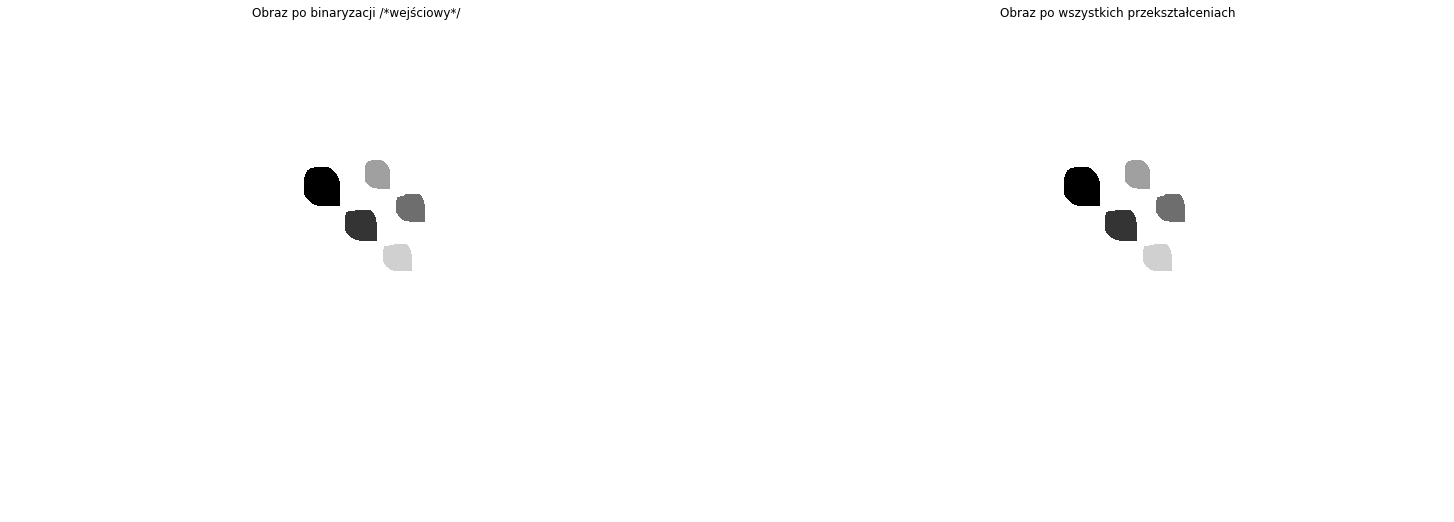

In [259]:
#for i in range(nimg.shape[0]):
#    for j in range(nimg.shape[1]):
#        if nimg[i][j] != 238.0:
#            nimg[i][j] = 255
show2imgs(bim, nimg, title1='Obraz po binaryzacji /*wejściowy*/', title2='Obraz po wszystkich przekształceniach', size=(25,25))

In [260]:
pola_monet = {0.01: 10674, 0.02: 15066, 0.05: 20265, 0.1: 12107, 0.2: 18275, 0.5: 22277, 1.0: 30209, 2.0: 26478, 5.0: 30475}

In [261]:
#sprawdzanie nominałów
#w fazie tworzenia 
wartosc = 0
for i in pola_nowe:
    #print(i)
    for j in pola_monet:
        if pola_nowe[i] > pola_monet[j]-700 and pola_nowe[i] < pola_monet[j]+900:
            print(i, "\t", j)
            wartosc += j
    
        
            
print("Wartość nominałów na tym obrazku wynosi:", wartosc)

162.0 	 0.01
7.0 	 0.05
209.0 	 0.01
114.0 	 0.01
Wartość nominałów na tym obrazku wynosi: 0.08
